# Table of Contents
```
1. Business Understanding
   1.1. Problem Description
2. Data Understanding
   2.1. Import Libraries, Modules, Functions, Objects, etc.
   2.2. User Defined Functions (UDFs)
   2.3. Data Loading
   2.4. Exploratory Data Analysis (EDA)
        2.4.1. Text EDA: Understand the raw data with Descriptive Statistics
        2.4.2. Visual EDA: Understand the data with Visualizations
               2.4.2.1. Draw Univariate plots to better understand each attribute
               2.4.2.2. Draw Multivariate plots to better understand the relationship between attributes
3. Research
   3.1. List of selected algorithms to build models
   3.2. List of model evaluation metrics
4. Data Preprocessing
   4.1. Data Cleaning
        4.1.1. Basic data cleaning
   4.2. Feature Selection
   4.3. Feature Engineering
   4.4. Dimensionality Reduction
   4.5. Split datasets for train-test
        4.5.1. Create Independent(X) and Dependent(y) variables
        4.5.2. Split the dataset into train and test
   4.6. Data Transforms
        4.6.1. Transforming Numerical type - Normalization/Feature Scaling
               4.6.1.1. Normalize X dataset
               4.6.1.2. Normalize X_train dataset
               4.6.1.3. Normalize X_test dataset
   4.7. Handling Imbalanced classes
5. Model Development
   5.1. Model definitions
6. Model Training
7. Model Refinement
   7.1. Hyperparameters Optimization with Grid Search
8. Model Evaluation
9. Final Model Selection
10. Model Validation
11. Model Deployment
```

# 1. Business Understanding

## 1.1. Problem Description

**`Problem statement`**:

`In business terms`: 

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction.

`In analytical terms`: 

Build a predictive model to predict credit card customers churn.

Input data are in `data/BankChurners.csv`, UAT data are in `data/BankChurners-uat.csv` and UAT validation data are in `data/BankChurners-uat-val.csv`.

**`Type of the problem`**: Supervised Learning - Classification - Univariate (Imbalanced classification)

**`Data source(s)`**: [Kaggle](https://www.kaggle.com/sakshigoyal7/credit-card-customers)
    
**`Author(s)`**: Balasubramanian Chandran

# 2. Data Understanding

## 2.1. Import Libraries, Modules, Functions, Objects, etc.

In [1]:
# Import necessary libraries for this project
import sys         as sys
import numpy       as np
import pandas      as pd
import sklearn     as sk
import scipy       as sp
import seaborn     as sns
import imblearn    as imb
import matplotlib  as mpl
import pickle      as pickle
import warnings

# Import the necessary Modules, Functions and Objects from the Libraries
from pandas                        import read_csv
from collections                   import Counter
from datetime                      import datetime
from imblearn.over_sampling        import SMOTE
from sklearn.metrics               import accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics               import confusion_matrix, classification_report
from sklearn.preprocessing         import LabelEncoder, StandardScaler, RobustScaler
from sklearn.model_selection       import cross_val_score, train_test_split
from sklearn.model_selection       import GridSearchCV, RepeatedStratifiedKFold
from sklearn.linear_model          import LogisticRegression, SGDClassifier
from sklearn.neighbors             import KNeighborsClassifier
from sklearn.svm                   import SVC
from sklearn.naive_bayes           import GaussianNB
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from xgboost                       import XGBClassifier
from matplotlib                    import pyplot as plt

# Check the versions of the imported libraries
print("Versions of imported libraries:")
print("Python:     {}".format(sys.version))
print("Numpy:      {}".format(np.__version__))
print("Pandas:     {}".format(pd.__version__))
print("skLearn:    {}".format(sk.__version__))
print("Scipy:      {}".format(sp.__version__))
print("Seaborn:    {}".format(sns.__version__))
print("Imblearn:   {}".format(imb.__version__))
print("Matplotlib: {}".format(mpl.__version__))

# Optional settings
mpl.style.use('ggplot')
sns.set(style='whitegrid')
pd.set_option('display.max_columns', None, 'precision', 3)
warnings.filterwarnings('ignore')

print(__doc__)

Versions of imported libraries:
Python:     3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]
Numpy:      1.19.5
Pandas:     1.3.2
skLearn:    0.24.2
Scipy:      1.6.2
Seaborn:    0.11.2
Imblearn:   0.7.0
Matplotlib: 3.4.2
Automatically created module for IPython interactive environment


## 2.2. User Defined Functions (UDFs)

In [2]:
def plot_histograms(df, features, rows, cols):
    fig = plt.figure(figsize=(15,22))
    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows,cols,i+1)
        df[feature].hist(bins=20, ax=ax, facecolor='midnightblue')
        ax.set_title(feature+" Distribution", color='brown', size='large')
    #ax.set_yscale('log')
    fig.tight_layout()  
    plt.show()

In [3]:
def plot_piechart(feature, title):
    fig, ax = plt.subplots(figsize=(5,5))
    count   = Counter(feature)
    ax.pie(count.values(), labels=count.keys(), autopct='%1.2f%%')
    ax.set_title(title, fontsize=15, alpha=0.6)
    plt.show()

In [4]:
def plot_barchart(feature, title, xlabel, ylabel, color):
    fig, ax      = plt.subplots(figsize=(8,6))
    count        = Counter(feature)
    count        = pd.Series(count).sort_values(ascending=True)
    count_values = count.values
    total_cust   = len(churn_df)
    labels       = []
    percent      = []
    j = 0
    for i in count.keys():
        labels.append(str(i))
        percent = str((count[i] / total_cust * 100))[:5] + '% '
        ax.text(x=count[i], y=j, s=percent, ha='right', va='center')
        j = j+1
    plt.barh(y=labels, width=count, height=0.5, color=color)
    plt.title(title, fontsize=15, alpha=0.6)
    plt.xlabel(xlabel, size='large', alpha=0.6)
    plt.ylabel(ylabel, size='large', alpha=0.6)
    # Remove the Outer frame from all 4 sides
    for spine in ax.spines:
        ax.spines[spine].set_visible(False)
    # Set only the Left & Bottom frames visible
    ax.spines['left'].set_visible(True)
    ax.spines['left'].set_alpha(0.4)
    ax.spines['bottom'].set_visible(True)
    ax.spines['bottom'].set_alpha(0.4)
    plt.show()

In [5]:
def plot_correlationmap(df):
    corr = df.corr()
    plt.figure(figsize = (30,12))
    sns.heatmap(corr, annot=True, cmap='tab20c')
    #sns.heatmap(corr, mask=corr<0.5, annot=True, cmap='tab20c')

In [6]:
def plot_scatterchart(f1x, f1y, f2x, f2y, f3x, f3y, f4x, f4y, title):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(25, 6))
    ax1.scatter(churn_df[f1x], churn_df[f1y])
    ax2.scatter(churn_df[f2x], churn_df[f2y])
    ax3.scatter(churn_df[f3x], churn_df[f3y])
    ax4.scatter(churn_df[f4x], churn_df[f4y])
    ax1.set_xlabel(f1x, fontsize=15, alpha=0.6)
    ax1.set_ylabel(f1y, fontsize=15, alpha=0.6)
    ax2.set_xlabel(f2x, fontsize=15, alpha=0.6)
    ax2.set_ylabel(f2y, fontsize=15, alpha=0.6)
    ax3.set_xlabel(f3x, fontsize=15, alpha=0.6)
    ax3.set_ylabel(f3y, fontsize=15, alpha=0.6)
    ax4.set_xlabel(f4x, fontsize=15, alpha=0.6)
    ax4.set_ylabel(f4y, fontsize=15, alpha=0.6)
    ax1.set_title(title, fontsize=25, alpha=0.6, pad=30)
    plt.show()

In [7]:
def plot_scalers_performance(df, f):
    i = 0
    fig, axes = plt.subplots(1, 5, figsize=(15,3))
    f1 = df[f]
    f2 = (df[f]+1).transform(np.log)
    f3 = pd.DataFrame(sp.stats.boxcox(df[f]+1)[0])
    f4 = pd.DataFrame(StandardScaler().fit_transform(np.array(df[f]).reshape(-1, 1)))
    f5 = pd.DataFrame(RobustScaler().fit_transform(np.array(df[f]).reshape(-1, 1)))
    for col in [[f1, 'cyan', 'Original'], [f2, 'plum', 'Log'], [f3, 'lightsalmon', 'Box-Cox'], 
                [f4, 'lightgreen', 'Standard'], [f5, 'pink', 'Robust']]:
        feature = col[0]
        color   = col[1]
        scale   = col[2]
        feature.hist(ax=axes[i], color=color)
        deciles = feature.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        for pos in np.array(deciles):
            handle = axes[i].axvline(pos, color='darkblue', linewidth=0.5)
        axes[i].legend([handle], ['decile'])
        axes[i].set_xlabel(scale)
        i += 1
    axes[2].set_title(f, fontsize=15, pad=15, alpha=0.6)
    axes[3].set_title('')
    axes[4].set_title('')
    plt.show()

In [8]:
def plot_scallings(df, title, fnames, f):
    i = 0
    fig, axes = plt.subplots(1, 5, figsize=(15,3))
    for col in [[f[i], 'cyan', 'Box-Cox'], [f[i+1], 'lightsalmon', 'Box-Cox'], [f[i+2], 'plum', 'Box-Cox'], 
                [f[i+3], 'lightgreen', 'Log'], [f[i+4], 'pink', 'Box-Cox']] :
        feature = col[0]
        color   = col[1]
        scale   = col[2]
        feature.hist(ax=axes[i], color=color)
        deciles = feature.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])
        for pos in np.array(deciles):
            handle = axes[i].axvline(pos, color='darkblue', linewidth=0.5)
        axes[i].legend([handle], ['decile'])
        axes[i].set_xlabel(fnames[i])
        i += 1
    axes[1].set_title(title, fontsize=15, pad=15, alpha=0.6)
    plt.show()

In [9]:
def plot_performance_metrics(scores_list, score_names, colors, model_names):
    fig, axes = plt.subplots(1, len(score_names), figsize=(14, 5))
    for i in range(len(score_names)):
        axes[i].bar(model_names, scores_list[i], color=colors[i])
        axes[i].set_title(score_names[i], fontsize=15, alpha=0.6, pad=20)
    j = 0
    for scores in scores_list:
        xpos = 0
        for i in scores:
            text = str(i*100)[:5]
            axes[j].text(x=xpos, y=i, s=text, ha='center', va='bottom')
            for spine in axes[j].spines:
                axes[j].spines[spine].set_visible(False)
                axes[j].spines['left'].set_visible(True)
                axes[j].spines['left'].set_alpha(0.4)
                axes[j].spines['bottom'].set_visible(True)
                axes[j].spines['bottom'].set_alpha(0.4)
            xpos += 1
        j += 1
    plt.show()

In [10]:
def find_optimal_hyperparameters(model, space, X_in, y_in):
    rskf  = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=10)     # Define evaluation
    gsauc = GridSearchCV(model, space, cv=rskf, n_jobs=-1, scoring='roc_auc')     # Define search
    gscvs = GridSearchCV(model, space, cv=rskf, n_jobs=-1, scoring='accuracy')    # Define search
    result_auc  = gsauc.fit(X_in, y_in)                                           # Execute search
    result_cvs  = gscvs.fit(X_in, y_in)                                           # Execute search
    return result_auc, result_cvs

In [11]:
def get_scores(data):
    scores     = []
    scores_idx = []
    for i in range(len(data)):
        scores.append(data[i]['score'])
        scores_idx.append(str(i))
    return scores, scores_idx

In [12]:
def plot_multiple_final_scores(results, scoring):
    plt.figure(figsize=(10, 10))
    plt.title('Final Model Selection using Multiple Scores', fontsize=15)
    plt.xlabel('Learning Rate')
    plt.ylabel('Score')

    ax = plt.gca()
    ax.set_xlim(0, 0.45)
    ax.set_ylim(0.6, 1.1)

    # Convert the Masked array into Numpy array for X-axis data
    X_axis = np.array(results['param_eta'].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['g', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std  = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, (sample_score_mean - sample_score_std),
                            (sample_score_mean + sample_score_std),
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.4f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)
    plt.show()

## 2.3. Data Loading

In [13]:
# Load the necessary input data files for this project
filename = 'data/BankChurners.csv'
churn_df  = read_csv(filename)

## 2.4. Exploratory Data Analysis (EDA)

### 2.4.1. `Text EDA`: Understand the raw data with Descriptive Statistics

#### Dimensions of the `churn` dataset:

In [14]:
churn_df.shape

(10127, 21)

#### Initial look at the raw data - First & Last 5 rows:

In [15]:
churn_df.head().style.background_gradient(cmap='BuGn', axis='rows').highlight_null(null_color='brown')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [16]:
churn_df.tail().style.background_gradient(cmap='BuGn', axis='rows').highlight_null(null_color='brown')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,6,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


#### Basic information of the dataset:

In [17]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

#### Statistical summary of the dataset:

In [18]:
churn_df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.013e+04,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000,10127.000
mean,7.392e+08,46.326,2.346,35.928,3.813,2.341,2.455,8631.954,1162.814,7469.140,0.760,4404.086,64.859,0.712,0.275
std,3.690e+07,8.017,1.299,7.986,1.554,1.011,1.106,9088.777,814.987,9090.685,0.219,3397.129,23.473,0.238,0.276
min,7.081e+08,26.000,0.000,13.000,1.000,0.000,0.000,1438.300,0.000,3.000,0.000,510.000,10.000,0.000,0.000
25%,7.130e+08,41.000,1.000,31.000,3.000,2.000,2.000,2555.000,359.000,1324.500,0.631,2155.500,45.000,0.582,0.023
50%,7.179e+08,46.000,2.000,36.000,4.000,2.000,2.000,4549.000,1276.000,3474.000,0.736,3899.000,67.000,0.702,0.176
75%,7.731e+08,52.000,3.000,40.000,5.000,3.000,3.000,11067.500,1784.000,9859.000,0.859,4741.000,81.000,0.818,0.503
max,8.283e+08,73.000,5.000,56.000,6.000,6.000,6.000,34516.000,2517.000,34516.000,3.397,18484.000,139.000,3.714,0.999


#### Explore NA / NULL values in the dataset:

In [19]:
null_values     = pd.DataFrame(data=churn_df.isnull().sum(), columns=['NULL count'])
null_values_per = pd.DataFrame(round(churn_df.isnull().sum() / len(churn_df) * 100, 2), columns=['NULL Percentage'])
null_values_df  = pd.concat([null_values, null_values_per], axis=1)
null_values_df

,NULL count,NULL Percentage
CLIENTNUM,0,0.0
Attrition_Flag,0,0.0
Customer_Age,0,0.0
Gender,0,0.0
Dependent_count,0,0.0
Education_Level,0,0.0
Marital_Status,0,0.0
Income_Category,0,0.0
Card_Category,0,0.0
Months_on_book,0,0.0


#### Explore duplicates in the dataset:

In [20]:
dup_df = churn_df.drop_duplicates()
print('Number of duplicates found:', (len(churn_df) - len(dup_df)))

Number of duplicates found: 0


### 2.4.2. `Visual EDA`: Understand the data with Visualizations

#### 2.4.2.1. Draw Univariate plots to better understand each attribute

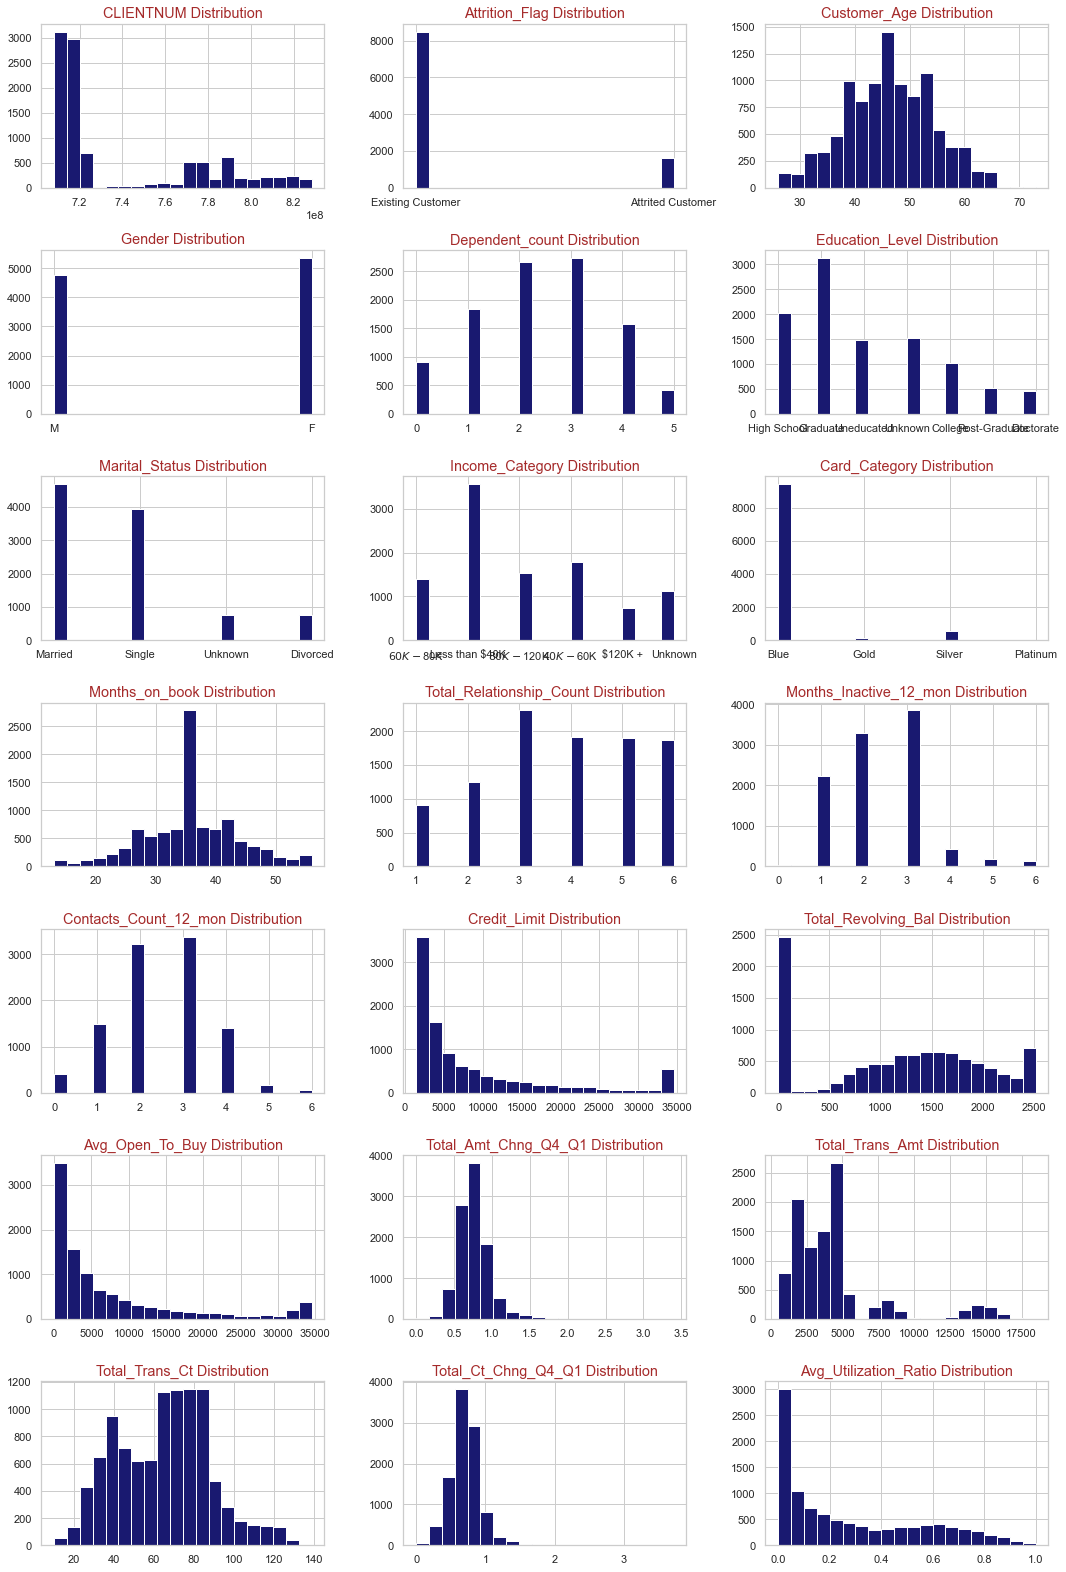

In [21]:
plot_histograms(churn_df, churn_df.columns, 7, 3)

#### Class ditributions of the dataset:

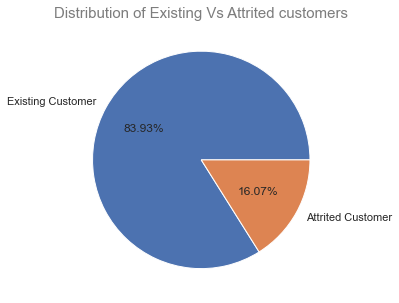

In [22]:
feature = churn_df.Attrition_Flag
title = 'Distribution of Existing Vs Attrited customers'
plot_piechart(feature, title)

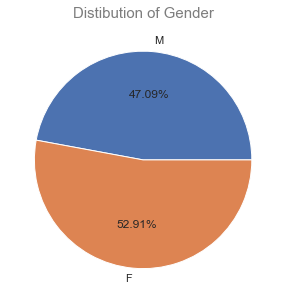

In [23]:
feature = churn_df.Gender
title   = 'Distibution of Gender'
plot_piechart(feature, title)

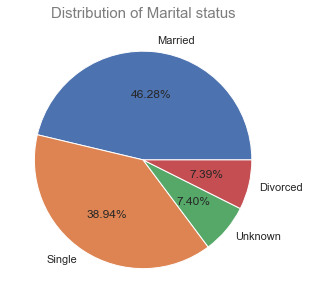

In [24]:
feature = churn_df.Marital_Status
title   = 'Distribution of Marital status'
xlabel  = 'Number of Customers'
ylabel  = 'Marital Status'
color   = 'cyan'
plot_piechart(feature, title)

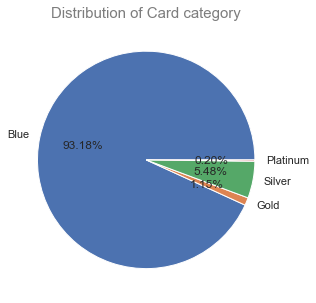

In [25]:
feature = churn_df.Card_Category
title   = 'Distribution of Card category'
plot_piechart(feature, title)

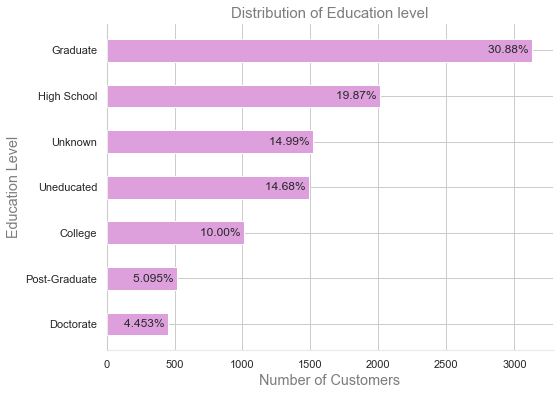

In [26]:
feature = churn_df.Education_Level
title   = 'Distribution of Education level'
xlabel  = 'Number of Customers'
ylabel  = 'Education Level'
color   = 'plum'
plot_barchart(feature, title, xlabel, ylabel, color)

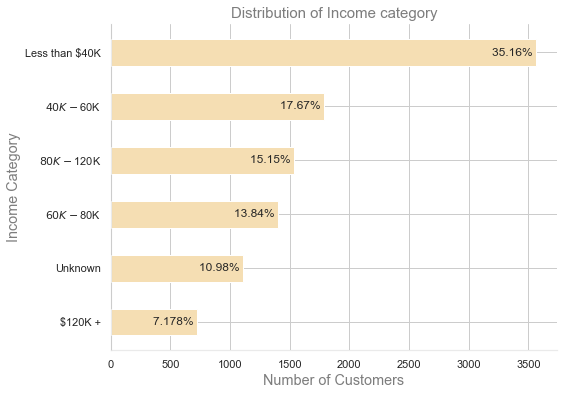

In [27]:
feature = churn_df.Income_Category
title   = 'Distribution of Income category'
xlabel  = 'Number of Customers'
ylabel  = 'Income Category'
color   = 'wheat'
plot_barchart(feature, title, xlabel, ylabel, color)

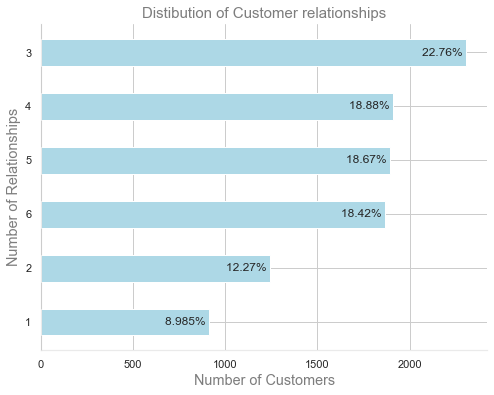

In [28]:
feature = churn_df.Total_Relationship_Count
title   = 'Distibution of Customer relationships'
xlabel  = 'Number of Customers'
ylabel  = 'Number of Relationships'
color   = 'lightblue'
plot_barchart(feature, title, xlabel, ylabel, color)

#### 2.4.3.2. Draw Multivariate plots to better understand the relationship between attributes

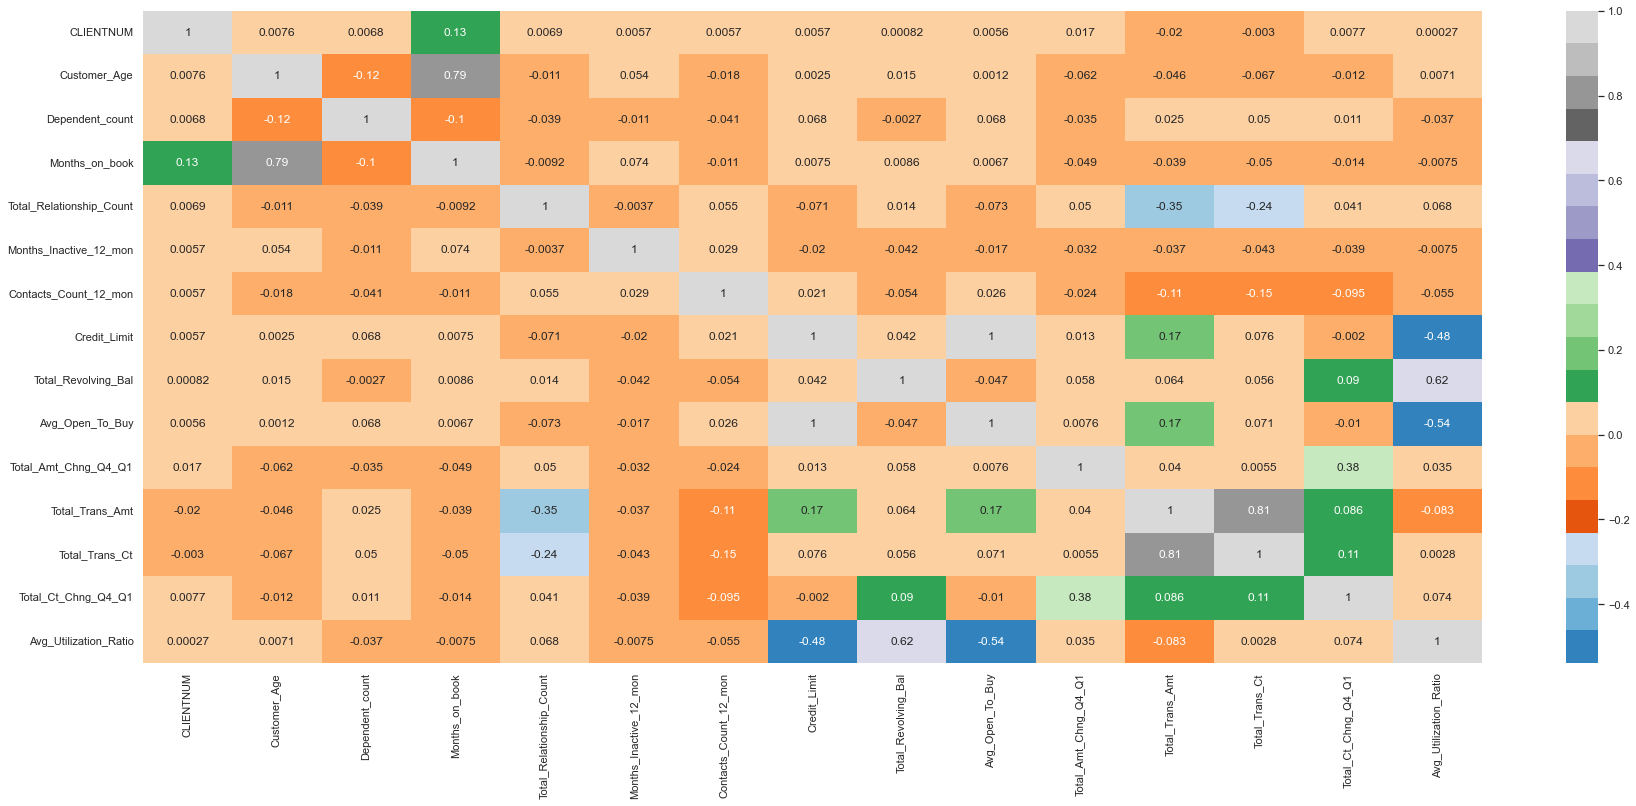

In [29]:
plot_correlationmap(churn_df)

Following features have high correlations:
```
'Customer_Age'        <---> 'Months_on_book'
'Credit_Limit'        <---> 'Avg_Open_To_Buy'
'Total_Revolving_Bal' <---> 'Avg_Utilization_Ratio'
'Total_Trans_Amt'     <---> 'Total_Trans_Ct'
```

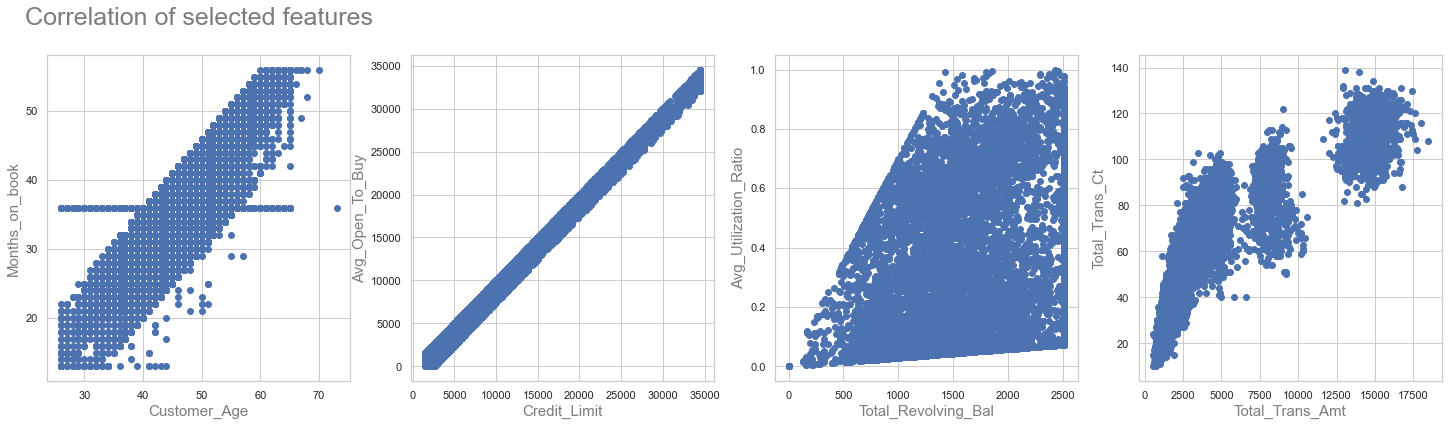

In [30]:
f1x, f1y = 'Customer_Age',        'Months_on_book'
f2x, f2y = 'Credit_Limit',        'Avg_Open_To_Buy'
f3x, f3y = 'Total_Revolving_Bal', 'Avg_Utilization_Ratio'
f4x, f4y = 'Total_Trans_Amt',     'Total_Trans_Ct'

title    = 'Correlation of selected features'

plot_scatterchart(f1x, f1y, f2x, f2y, f3x, f3y, f4x, f4y, title)

# 3. Research

## 3.1. List of selected algorithms to build models

The following are the algorithms covering a variety of classification strategies and techniques that have been selected for the project. All models will be developed with default parameters and trained. Only a few best will be selected for algorithm tuning based on their performances (evaluation metrics). Then, each of those models will be individually tuned to minimize error. The final model will be selected based on their evaluation metrics on training and test datasets. 

#### Classification algorithms:
```
 1) Logistic Regression (LR)         LogisticRegression()            - Simple Linear
 2) SGD Classifier (SGD)             SGDClassifier()                 - Simple Linear
 3) K-Nearest Neighbors (KNN)        KNeighborsClassifier()          - Nonlinear
 4) Support Vector Machines (SVM)    SVC()                           - Nonlinear
 5) Gaussian Naive Bayes (NB)        GaussianNB()                    - Nonlinear
 6) Decision Trees (DT)              DecisionTreeClassifier()        - Nonlinear
 7) Random Forest Trees (RF)         RandomForestClassifier()        - Ensemble Bagging
 8) Gradient Boosting (GB)           GradientBoostingClassifier()    - Ensemble Boosting   
 9) AdaBoost (ADA)                   AdaBoostClassifier()            - Ensemble Boosting
10) XGBoost  (XGB)                   XGBClassifier()                 - Ensemble Boosting
```

## 3.2. List of model evaluation metrics

#### Classification model evaluation metrics:
The following metrics have been selected as the `evaluation metrics` for training, refining and evaluating the models.
```
1) CV Scores (Accuracy)
2) ROC-AUC (Area Under the ROC curve)
3) Algorithm run-time

* The following are not metrics, but they help to gain insight into the type of errors a model is making.
   - Confusion matrix
   - Classification report (produces Precision, Recall, F1 scores)
```

Build the above mentioned models, with default parameters, and select the best one based on their `train` & `test` scores.

#### Additional Note:
* Use the `Attrition_Flag` column as the `Target / Predictor` variable.
* Model selection should be based on the ROC-AUC score over 0.75 at least.
* Generally the total runtime should be less than 10 mins. 

# 4. Data Preprocessing

## 4.1. Data Cleaning

### 4.1.1. Basic data cleaning

#### Remove the duplicate features/columns:

In [31]:
df1 = churn_df.copy()
df1.drop('CLIENTNUM', axis=1, inplace=True)

#### Remove the duplicate samples/rows:

Not required to perform this step as there are no duplicates found in Section 2.4.1.

#### Handling missing / Null values:

Not required to perform this step as there are no NULLs found in Section 2.4.1.

## 4.2. Feature Selection

*All the features will be used during model development.*

## 4.3. Feature Engineering

The features in the dataset that have Categorical values that need to be converted into numerical values are:
```
Gender
Education_Level
Marital_Status
Income_Category
Card_Category
Attrition_Flag
```

In [32]:
le       = LabelEncoder()
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Attrition_Flag']
for col in cat_cols:
    df1[col] = le.fit_transform(df1[col])

## 4.4. Dimensionality Reduction

*No PCA need to be done.*

## 4.5. Split datasets for train-test

#### Keep only one dataframe (df) and delete the rest and release memory for ML processing

In [33]:
df_cleaned = df1.copy()
del df1

### 4.5.1. Create Independent(X) and Dependent(y) variables

In [34]:
X = df_cleaned.drop(['Attrition_Flag'], axis=1)   # Independent variables
y = df_cleaned['Attrition_Flag']                  # Dependent variable

### 4.5.2. Split the dataset into *`train`* and *`test`*

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('X_train:', X_train.shape)
print('X_test :', X_test.shape)
print('y_train:', y_train.shape)
print('y_test :', y_test.shape)
print('X      :', X.shape)
print('y      :', y.shape)

X_train: (8101, 19)
X_test : (2026, 19)
y_train: (8101,)
y_test : (2026,)
X      : (10127, 19)
y      : (10127,)


## 4.6. Data Transforms

### 4.6.1. Transforming `Numerical type` - Normalization/Feature Scaling

From Section 2.4.2., it's observed that the following features have the least-evenly distributed values which need feature scalling. 
```
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio
```
Let's perform the following scallings on each of the above mentioned features and choose the best one for each feature. Then, we will apply the selected techniques for X_train and X_test separately to avoid data leakage.
```
1) Log transform
2) Box-Cox
3) Standard Scaler
4) Robust Scaler
```

#### Identify which Feature Scalling technique works for which feature:

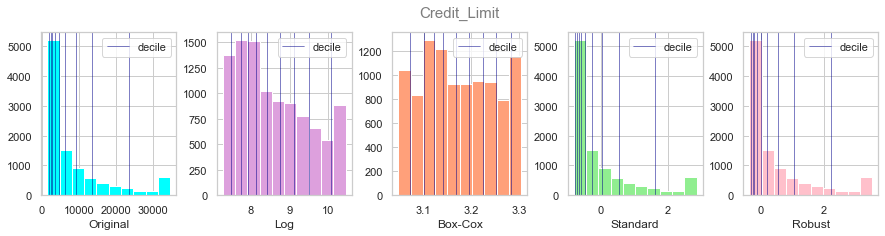

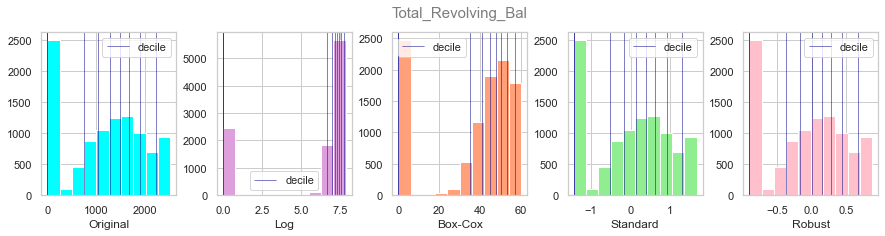

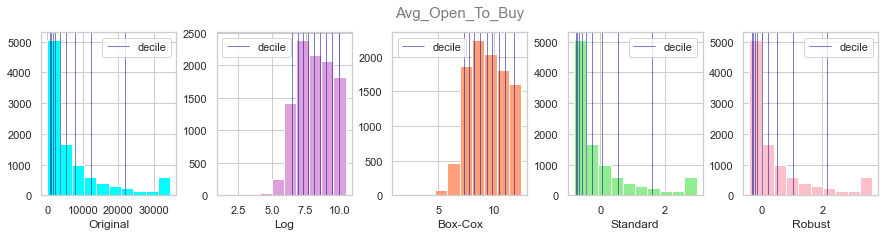

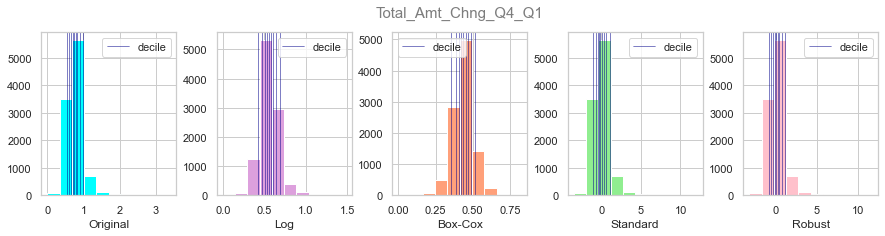

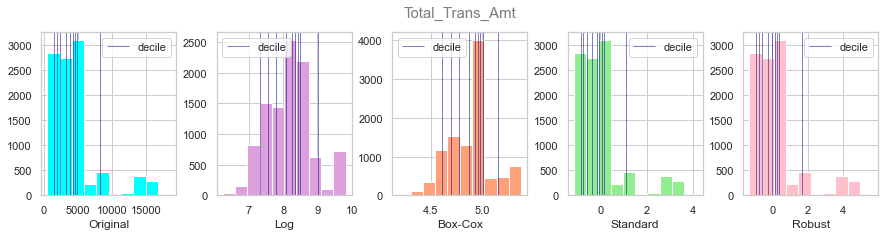

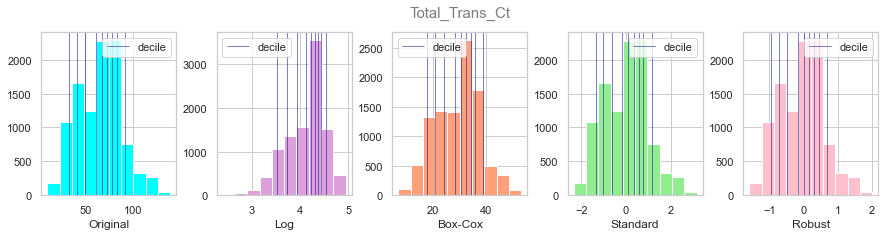

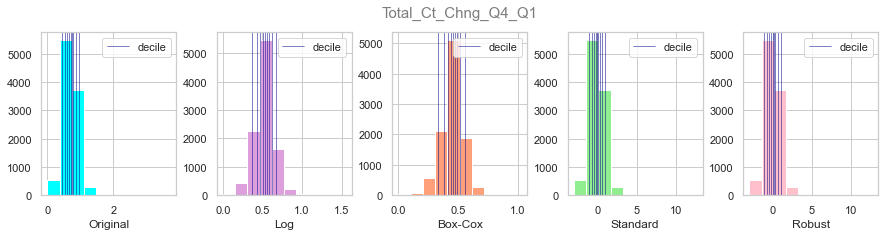

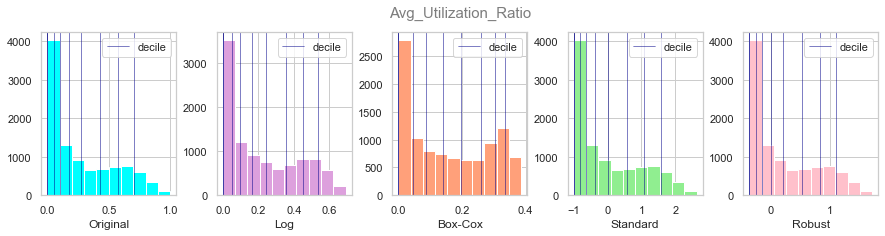

In [36]:
features_to_transform = ['Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 
                         'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']
for feature in features_to_transform:
    plot_scalers_performance(X, feature)

Based on the checks above, let's perform feature scallings as below for the selected attributes.
```
Credit_Limit           - Box-cox
Total_Revolving_Bal    - No scalling
Avg_Open_To_Buy        - Box-Cox
Total_Amt_Chng_Q4_Q1   - Box-Cox
Total_Trans_Amt        - Log transform
Total_Trans_Ct         - No scalling
Total_Ct_Chng_Q4_Q1    - Box-cox
Avg_Utilization_Ratio  - No scalling
```

#### 4.6.1.1. Normalize `X` dataset

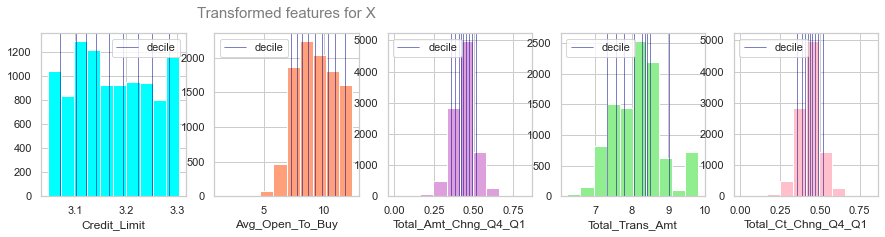

In [37]:
X_norm = X.copy()

# Perform Feature Scalling X
X_norm['Credit_Limit']         = sp.stats.boxcox(X['Credit_Limit']+1)[0]
X_norm['Avg_Open_To_Buy']      = sp.stats.boxcox(X['Avg_Open_To_Buy']+1)[0]
X_norm['Total_Amt_Chng_Q4_Q1'] = sp.stats.boxcox(X['Total_Amt_Chng_Q4_Q1']+1)[0]
X_norm['Total_Trans_Amt']      = (X['Total_Trans_Amt']+1).transform(np.log)
X_norm['Total_Ct_Chng_Q4_Q1']  = sp.stats.boxcox(X['Total_Ct_Chng_Q4_Q1']+1)[0]

# Plot feature scalling for X and verify
title    = 'Transformed features for X'
fnames   = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
features = [X_norm['Credit_Limit'], X_norm['Avg_Open_To_Buy'], X_norm['Total_Amt_Chng_Q4_Q1'],  
            X_norm['Total_Trans_Amt'], X_norm['Total_Amt_Chng_Q4_Q1']]
plot_scallings(X_norm, title, fnames, features)

#### 4.6.1.2. Normalize `X_train` dataset

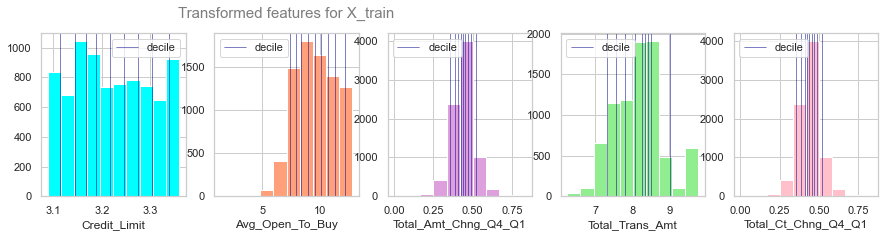

In [38]:
X_train_norm = X_train.copy()

# Perform Feature Scalling X
X_train_norm['Credit_Limit']         = sp.stats.boxcox(X_train['Credit_Limit']+1)[0]
X_train_norm['Avg_Open_To_Buy']      = sp.stats.boxcox(X_train['Avg_Open_To_Buy']+1)[0]
X_train_norm['Total_Amt_Chng_Q4_Q1'] = sp.stats.boxcox(X_train['Total_Amt_Chng_Q4_Q1']+1)[0]
X_train_norm['Total_Trans_Amt']      = (X_train['Total_Trans_Amt']+1).transform(np.log)
X_train_norm['Total_Ct_Chng_Q4_Q1']  = sp.stats.boxcox(X_train['Total_Ct_Chng_Q4_Q1']+1)[0]

# Plot feature scalling for X and verify
title    = 'Transformed features for X_train'
fnames   = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
features = [X_train_norm['Credit_Limit'], X_train_norm['Avg_Open_To_Buy'], X_train_norm['Total_Amt_Chng_Q4_Q1'],  
            X_train_norm['Total_Trans_Amt'], X_train_norm['Total_Amt_Chng_Q4_Q1']]
plot_scallings(X_train_norm, title, fnames, features)

#### 4.6.1.3. Normalize `X_test` dataset

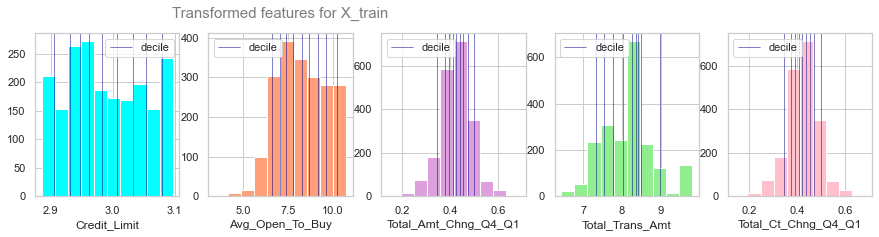

In [39]:
X_test_norm = X_test.copy()

# Perform Feature Scalling X
X_test_norm['Credit_Limit']         = sp.stats.boxcox(X_test['Credit_Limit']+1)[0]
X_test_norm['Avg_Open_To_Buy']      = sp.stats.boxcox(X_test['Avg_Open_To_Buy']+1)[0]
X_test_norm['Total_Amt_Chng_Q4_Q1'] = sp.stats.boxcox(X_test['Total_Amt_Chng_Q4_Q1']+1)[0]
X_test_norm['Total_Trans_Amt']      = (X_test['Total_Trans_Amt']+1).transform(np.log)
X_test_norm['Total_Ct_Chng_Q4_Q1']  = sp.stats.boxcox(X_test['Total_Ct_Chng_Q4_Q1']+1)[0]

# Plot feature scalling for X and verify
title    = 'Transformed features for X_train'
fnames   = ['Credit_Limit', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Ct_Chng_Q4_Q1']
features = [X_test_norm['Credit_Limit'], X_test_norm['Avg_Open_To_Buy'], X_test_norm['Total_Amt_Chng_Q4_Q1'],  
            X_test_norm['Total_Trans_Amt'], X_test_norm['Total_Amt_Chng_Q4_Q1']]
plot_scallings(X_test_norm, title, fnames, features)

## 4.7. Handling Imbalanced classes

In [40]:
count1 = Counter(y)
count2 = Counter(y_train)
print('Distribution of Target variable - Existing(1) & Attrited(0) customers in X is:      ', count1[1], '&', count1[0])
print('Distribution of Target variable - Existing(1) & Attrited(0) customers in X_train is:', count2[1], '&', count2[0])

Distribution of Target variable - Existing(1) & Attrited(0) customers in X is:       8500 & 1627
Distribution of Target variable - Existing(1) & Attrited(0) customers in X_train is: 6805 & 1296


*It's observed that the '1' target has 5 times more samples than the '0' target. Therefore, we need to balance them using SMOTE (Synthetic Minority Oversampling TEchnique).*

#### Resample datasets using SMOTE and make the samples balanced for better learning:

In [41]:
X_train_norm_smote, y_train_smote = SMOTE().fit_resample(X_train_norm, y_train)
X_norm_smote, y_smote             = SMOTE().fit_resample(X_norm, y)

**`NOTE`**: SMOTE resampling should not be done for *`X_test`*, *`X_test_norm`* & *`y_test`* datasets.

In [42]:
print('Shapes of the datasets before & after SMOTE:\n')
print('%12s     %11s     %11s' % ('Dataset name', 'Before', 'After'))
print('%12s     %11s     %11s' % ('------------', '-----------', '-----------'))
print('%12s     %11s     %11s' % ('X_norm', X_norm.shape, X_norm_smote.shape))
print('%12s     %11s     %11s' % ('y', y.shape, y_smote.shape))
print('%12s     %11s     %11s' % ('X_train_norm', X_train_norm.shape, X_train_norm_smote.shape))
print('%12s     %11s     %11s' % ('y_train', y_train.shape, y_train_smote.shape))

Shapes of the datasets before & after SMOTE:

Dataset name          Before           After
------------     -----------     -----------
      X_norm     (10127, 19)     (17000, 19)
           y        (10127,)        (17000,)
X_train_norm      (8101, 19)     (13610, 19)
     y_train         (8101,)        (13610,)


# 5. Model Development

## 5.1. Model definitions

In [43]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('SGD', SGDClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVM', SVC()))
models.append(('NB', GaussianNB()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AdaB', AdaBoostClassifier()))
models.append(('XGB', XGBClassifier()))

# 6. Model Training

During this stage, the *`evaluation metrics`* are generated using the *`training datasets`*. Based on their performance, only *`few models will be selected`* for further improvement.

In [44]:
modelnames_trng = []
y_preds         = []
scores_auc_trng = []
scores_cvs_trng = []

print('Training the developed models in progress:')
start_time = datetime.now()

i = 0
for name, model in models:
    stime = datetime.now()
    model.fit(X_train_norm_smote, y_train_smote)
    y_pred = model.predict(X_test_norm)
    modelnames_trng.append(name)
    y_preds.append(y_pred)

    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=52)
    cv_results = cross_val_score(model, X_train_norm_smote, y_train_smote, cv=cv, scoring='accuracy')

    scores_auc_trng.append(roc_auc_score(y_test, y_pred))
    scores_cvs_trng.append(np.mean(cv_results))
    
    i = i + 1
    etime = datetime.now()
    print('%15s  Training complete...  ' % name, (etime - stime))
    
end_time = datetime.now()
elapsed_time = end_time - start_time
print('\nTotal elapsed time: ', elapsed_time, '\n')

Training the developed models in progress:
             LR  Training complete...   0:00:01.102608
            SGD  Training complete...   0:00:01.318965
            KNN  Training complete...   0:00:06.902408
            SVM  Training complete...   0:00:55.865712
             NB  Training complete...   0:00:00.089086
           CART  Training complete...   0:00:00.886719
             RF  Training complete...   0:00:14.253668
             GB  Training complete...   0:00:24.954516
           AdaB  Training complete...   0:00:06.015112
            XGB  Training complete...   0:00:08.335721

Total elapsed time:  0:01:59.724515 



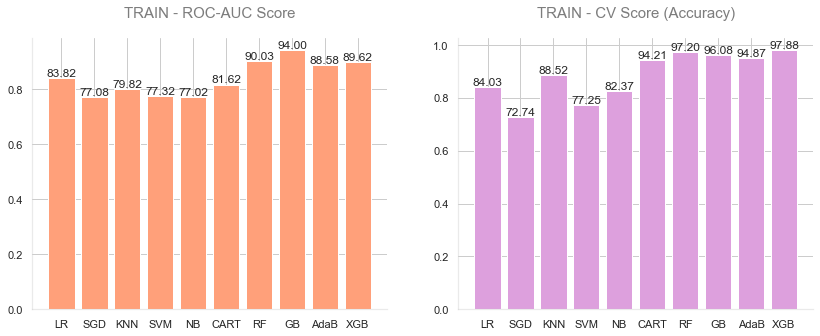

In [45]:
# Plot and compare the scores
scores_list = [scores_auc_trng, scores_cvs_trng]
score_names = ['TRAIN - ROC-AUC Score', 'TRAIN - CV Score (Accuracy)']
colors      = ['lightsalmon', 'plum']

plot_performance_metrics(scores_list, score_names, colors, modelnames_trng)

Based on the training performance metrics, the following models are selected for model-tuning.
```
    1) XGBoost            [Ranks (auc, cv): 3, 1]
    2) Gradient Boosting  [Ranks (auc, cv): 1, 3]
    3) Random Forest      [Ranks (auc, cv): 2, 2]
```
Cut-off values considered for initial model selection are:

    AUC Score cut-off:   > 89 % (+ve measure, bigger is better, Best score - 100, Poor score - 0)
    CV  Score cut-off:   > 95 % (+ve measure, bigger is better, Best score - 100, Poor score - 0)

# 7. Model Refinement

## 7.1. Hyperparameters Optimization with Grid Search

#### Extreme Boosting (XGB):

In [46]:
model              = XGBClassifier()                                # Define model
space              = dict()                                         # Define search space
space['eta']       = [0.001, 0.01, 0.1, 0.2, 0.3]
space['subsample'] = [0.5, 1.0]

result_auc_xgb, result_cvs_xgb = find_optimal_hyperparameters(model, space, 
                                                              X_train_norm_smote, 
                                                              y_train_smote)

#### Gradient Boosting (GB):

In [47]:
model              = GradientBoostingClassifier()                   # Define model
space              = dict()                                         # Define search space
space['subsample'] = [0.5, 1.0]
space['max_depth'] = [3, 7, 9]

result_auc_gb, result_cvs_gb = find_optimal_hyperparameters(model, space,
                                                            X_train_norm_smote,
                                                            y_train_smote)

#### Random Forest (RF):

In [48]:
model                 = RandomForestClassifier()                    # Define model
space                 = dict()                                      # Define search space
space['max_features'] = ['sqrt', 'log2']
space['n_estimators'] = [10, 100, 1000]

result_auc_rf, result_cvs_rf = find_optimal_hyperparameters(model, space,
                                                            X_train_norm_smote,
                                                            y_train_smote)

In [49]:
scores_auc_rfnd = [result_auc_xgb.best_score_, result_auc_gb.best_score_, result_auc_rf.best_score_]
scores_cvs_rfnd = [result_cvs_xgb.best_score_, result_cvs_gb.best_score_, result_cvs_rf.best_score_]

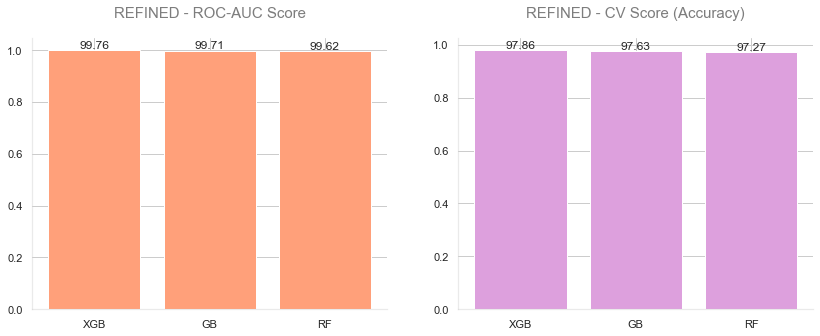

In [50]:
# Plot and compare the scores
scores_list     = [scores_auc_rfnd, scores_cvs_rfnd]
score_names     = ['REFINED - ROC-AUC Score', 'REFINED - CV Score (Accuracy)']
colors          = ['lightsalmon', 'plum']
modelnames_rfnd = ['XGB', 'GB', 'RF']

plot_performance_metrics(scores_list, score_names, colors, modelnames_rfnd)

In [51]:
best_params_auc = [result_auc_xgb.best_params_, result_auc_gb.best_params_, result_auc_rf.best_params_]
best_params_cvs = [result_cvs_xgb.best_params_, result_cvs_gb.best_params_, result_cvs_rf.best_params_]

print('Model Name                         Best AUC Hyperparameters                          Best CV Hyperparameters')
print('----------   ----------------------------------------------   ----------------------------------------------')
for i in range(len(modelnames_rfnd)):
    print('%10s   %46s   %46s' % (modelnames_rfnd[i], best_params_auc[i], best_params_cvs[i]))

Model Name                         Best AUC Hyperparameters                          Best CV Hyperparameters
----------   ----------------------------------------------   ----------------------------------------------
       XGB                   {'eta': 0.3, 'subsample': 1.0}                   {'eta': 0.3, 'subsample': 1.0}
        GB               {'max_depth': 9, 'subsample': 0.5}               {'max_depth': 9, 'subsample': 0.5}
        RF   {'max_features': 'log2', 'n_estimators': 1000}   {'max_features': 'sqrt', 'n_estimators': 1000}


# 8. Model Evaluation

In [52]:
xgb_eta         = 0.3
xgb_subsample   = 1
gb_max_depth    = 9
gb_subsample    = 0.5
rf_max_features = 'sqrt'
rf_n_estimators = 1000

models_eval     = [models[9], models[7], models[6]]
y_preds         = []
scores_auc_eval = []
scores_cvs_eval = []

print('Evaluating the developed models in progress:')
start_time = datetime.now()

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=2)

i = 0
for name, model in models_eval:
    stime = datetime.now()
    model.fit(X_train_norm_smote, y_train_smote)
    y_pred = model.predict(X_test_norm)
    y_preds.append(y_pred)

    cv_results = cross_val_score(model, X_train_norm_smote, y_train_smote, cv=cv, scoring='accuracy')

    scores_auc_eval.append(roc_auc_score(y_test, y_pred))
    scores_cvs_eval.append(np.mean(cv_results))
    
    i = i + 1
    etime = datetime.now()
    print('%15s  Evaluation complete...  ' % name, (etime - stime))
    
end_time = datetime.now()
elapsed_time = end_time - start_time
print('\nTotal elapsed time: ', elapsed_time, '\n')

Evaluating the developed models in progress:
            XGB  Evaluation complete...   0:00:07.023561
             GB  Evaluation complete...   0:00:25.820698
             RF  Evaluation complete...   0:00:15.326958

Total elapsed time:  0:00:48.171217 



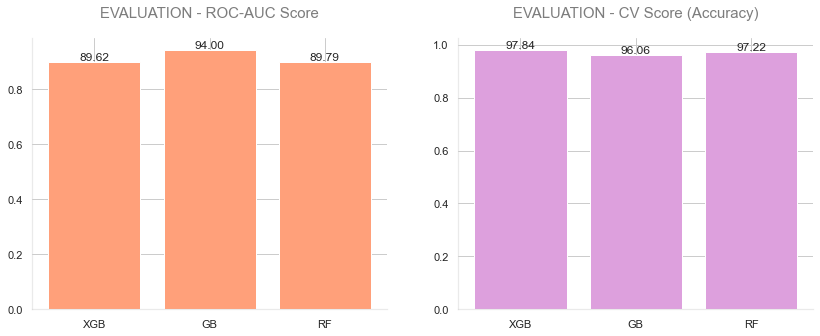

In [53]:
# Plot and compare the scores
scores_list     = [scores_auc_eval, scores_cvs_eval]
score_names     = ['EVALUATION - ROC-AUC Score', 'EVALUATION - CV Score (Accuracy)']
colors          = ['lightsalmon', 'plum']

plot_performance_metrics(scores_list, score_names, colors, modelnames_rfnd)

In [54]:
modelnames_eval = ['EXTREM BOOSTING', 'GRADIENT BOOSTING', 'RANDOM FOREST']

i = 0
for name in modelnames_eval:
    print('%5s Confusion Matrix: \n' % name, confusion_matrix(y_test, y_preds[i]))
    print('%5s Classification Report: \n' % name, classification_report(y_test, y_preds[i]))
    i = i + 1

EXTREM BOOSTING Confusion Matrix: 
 [[ 268   63]
 [  29 1666]]
EXTREM BOOSTING Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.81      0.85       331
           1       0.96      0.98      0.97      1695

    accuracy                           0.95      2026
   macro avg       0.93      0.90      0.91      2026
weighted avg       0.95      0.95      0.95      2026

GRADIENT BOOSTING Confusion Matrix: 
 [[ 303   28]
 [  60 1635]]
GRADIENT BOOSTING Classification Report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       331
           1       0.98      0.96      0.97      1695

    accuracy                           0.96      2026
   macro avg       0.91      0.94      0.92      2026
weighted avg       0.96      0.96      0.96      2026

RANDOM FOREST Confusion Matrix: 
 [[ 273   58]
 [  49 1646]]
RANDOM FOREST Classification Report: 
               precision    recall 

# 9. Final Model Selection

#### Analysis of the Performance metrics generated during Model Training, Refinement and Evaluation stages.

```
|                   |          ROC-AUC SCORE (%)         |            CV SCORE (%)            | ALGORITHM RUN-TIME (in Sec) |
| MODEL STAGE       |------------------------------------|------------------------------------|-----------------------------|
|                   | TRAINING | REFINEMENT | EVALUATION | TRAINING | REFINEMENT | EVALUATION |   TRAINING   |  EVALUATION  |
|-------------------|------------------------------------|------------------------------------|--------------|--------------|
| Extreme Boosting  |   89.62  |   99.76    |   89.62    |   97.88  |   97.86    |   97.84    |    08.33     |    07.02     |
| Gradient Boosting |   94.00  |   99.71    |   94.00    |   96.08  |   97.63    |   96.06    |    24.95     |    25.82     |
| Random Forest     |   90.03  |   99.62    |   89.79    |   97.20  |   97.27    |   97.22    |    14.25     |    15.33     |
```

#### Plotting Final Model using multiple scores

In [55]:
st   = datetime.now()
etas = [i/100 for i in range(0, 45)]
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}
gs      = GridSearchCV(estimator=XGBClassifier(random_state=1),
                       param_grid={'eta': etas, 'subsample': [1]}, cv=5, n_jobs=-1, 
                       scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_norm_smote, y_smote)
et = datetime.now()
print('Elapsed time...   ', (et - st))
results = gs.cv_results_

Elapsed time...    0:01:55.188112


In [56]:
print('Best score:  ', gs.best_score_)
print('Best params: ', gs.best_params_)

Best score:   0.9652618339100346
Best params:  {'eta': 0.34, 'subsample': 1}


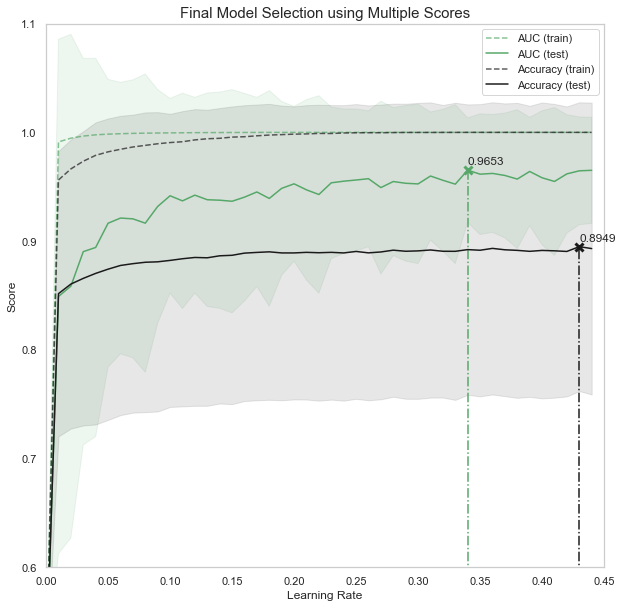

In [57]:
plot_multiple_final_scores(results, scoring)

The scores generated at various stages (ROC-AUC scores, CV scores, and Algorithm run times) suggest that the **`EXTREME BOOSTING (XGB)`** *is the clear winner*. XGB is the best model and it is selected as the final model. XGB will be trained on the entire dataset, saved, and deployed into the test infrastructure for business user's testing (i.e., Model Validation).

In [58]:
# Train XGBOOST model with the whole dataset and save the model
FinalModel = XGBClassifier(eta=xgb_eta, subsample=xgb_subsample).fit(X_norm_smote, y_smote)

ModelName  = 'MLPy-DemoProj-6.sav'
pickle.dump(FinalModel, open(ModelName, 'wb'))

# 10. Model Validation

The model validation is done by the business users. Usually, 2 types of testings are done using the *`unseen UAT datasets`*. They are,
* User Acceptance Testing (UAT)
* A/B Testing

Following is shown as UAT for demo purpose.

In [59]:
# Load the model from the disk and Use it on the real/ unseen data
ModelName = 'MLPy-DemoProj-6.sav'
uat_data_filename = 'data/BankChurners-uat.csv'
uat_val_filename  = 'data/BankChurners-uat-val.csv'
unseen_churn      = read_csv(uat_data_filename)
unseen_churn_val  = read_csv(uat_val_filename)

# Drop the CLIENTNUM as done during the Data Preprocessing stage
unseen_churn.drop('CLIENTNUM', axis=1, inplace=True)

# Convert the Categorical features into Numerical features in UAT dataset
le         = LabelEncoder()
uat_cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
for col in uat_cat_cols:
    unseen_churn[col] = le.fit_transform(unseen_churn[col])

# Perform Feature Scalling in UAT dataset
unseen_churn_norm = unseen_churn.copy()
unseen_churn_norm['Credit_Limit']         = sp.stats.boxcox(unseen_churn['Credit_Limit']+1)[0]
unseen_churn_norm['Avg_Open_To_Buy']      = sp.stats.boxcox(unseen_churn['Avg_Open_To_Buy']+1)[0]
unseen_churn_norm['Total_Amt_Chng_Q4_Q1'] = sp.stats.boxcox(unseen_churn['Total_Amt_Chng_Q4_Q1']+1)[0]
unseen_churn_norm['Total_Trans_Amt']      = (unseen_churn['Total_Trans_Amt']+1).transform(np.log)
unseen_churn_norm['Total_Ct_Chng_Q4_Q1']  = sp.stats.boxcox(unseen_churn['Total_Ct_Chng_Q4_Q1']+1)[0]

# Load the saved final model from the disk predict the results on the unseen data
FinalModel_loaded = pickle.load(open(ModelName, 'rb'))
pred_final        = FinalModel_loaded.predict(unseen_churn_norm)

print('Expected result(s):  ', np.ravel(unseen_churn_val))
print('Predicted result(s): ', pred_final)
print('Accuracy Score: %.2f%%' % (accuracy_score(unseen_churn_val, pred_final)*100))
print('ROC-AUC Score:  %.2f%%' % (roc_auc_score(unseen_churn_val, pred_final)*100))
print('\nConfusion Matrix: \n', confusion_matrix(unseen_churn_val, pred_final))
print('\nClassification Report: \n', classification_report(unseen_churn_val, pred_final))

Expected result(s):   [1 1 1 0 0 0 0 1 1 0 1 0 1]
Predicted result(s):  [1 1 1 0 0 1 0 1 1 0 1 0 1]
Accuracy Score: 92.31%
ROC-AUC Score:  91.67%

Confusion Matrix: 
 [[5 1]
 [0 7]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.88      1.00      0.93         7

    accuracy                           0.92        13
   macro avg       0.94      0.92      0.92        13
weighted avg       0.93      0.92      0.92        13



# 11. Model Deployment

The *`evaluation metrics`* generated in Model Validation stage are 100% accurate. Hence, the final model is ready for deployment.

The model deployment is usually done by the DS team along with the ML team upon receipt of stakeholders sign-off.